In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

day_df = pd.read_excel("freq_day.xlsx")
month_df = pd.read_excel("freq_month.xlsx")
nat_df = pd.read_excel("freq_nat.xlsx")

In [76]:
month_df.head()

,Année,janvier,février,mars,avril,mai,juin,juillet,août,septembre,octobre,novembre,décembre
0,1980,14.5,15.4,15.8,14.6,13.4,11.6,12.9,13.4,13.8,15.4,15.7,19.1
1,1981,16.1,15.8,15.3,14.7,13.7,11.9,13.5,14.6,16.3,18.0,18.2,21.1
2,1982,19.5,18.1,18.1,16.5,14.0,11.7,12.8,16.0,13.8,20.6,19.1,21.8
3,1983,18.5,17.3,19.1,18.4,15.8,11.3,11.3,14.3,14.4,19.5,18.9,20.0
4,1984,16.8,16.5,17.9,16.7,14.7,10.7,11.4,13.7,15.2,18.7,18.0,20.6


In [77]:
df = month_df
# pivoter pour que les colonnes de mois deviennent des valeurs d'une nouvelle colonne 'Mois' et leur valeur associée une colonne "entrée(millions)"
df = pd.melt(df, id_vars=['Année'], var_name='Mois', value_name="Entrées (Millions)")
month_df = df

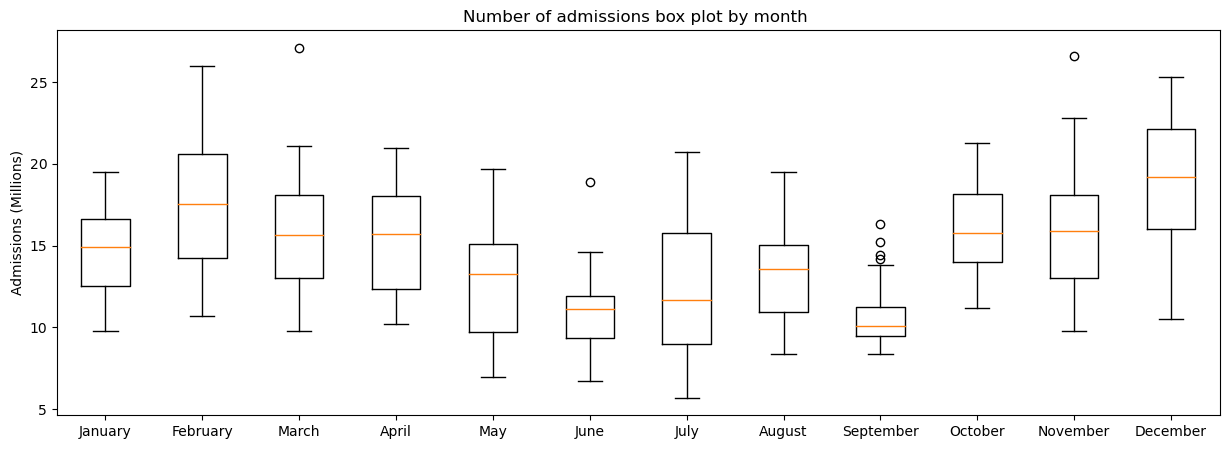

In [78]:
#BOX PLOT : boite à moustaches
df = month_df
#suppression outlier
df = df.loc[df['Année'] != 2020 ]

m1= df.loc[df['Mois'] == "janvier", :]['Entrées (Millions)']
m2= df.loc[df['Mois'] == "février", :]['Entrées (Millions)']
m3= df.loc[df['Mois'] == "mars", :]['Entrées (Millions)']
m4= df.loc[df['Mois'] == "avril", :]['Entrées (Millions)']
m5= df.loc[df['Mois'] == "mai", :]['Entrées (Millions)']
m6= df.loc[df['Mois'] == "juin", :]['Entrées (Millions)']
m7= df.loc[df['Mois'] == "juillet", :]['Entrées (Millions)']
m8= df.loc[df['Mois'] == "août", :]['Entrées (Millions)']
m9= df.loc[df['Mois'] == "septembre", :]['Entrées (Millions)']
m10= df.loc[df['Mois'] == "octobre", :]['Entrées (Millions)']
m11= df.loc[df['Mois'] == "novembre", :]['Entrées (Millions)']
m12= df.loc[df['Mois'] == "décembre", :]['Entrées (Millions)']

fig, ax = plt.subplots()
fig.set_size_inches(15,5)
ax.boxplot([m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12])
plt.ylabel("Admissions (Millions)")
plt.title("Number of admissions box plot by month ")
# Ajouter une légende pour l'axe des abcisses. 
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax.set_xticklabels(['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.show()

In [79]:
df = day_df
# pivoter pour que les colonnes de jour deviennent des valeurs d'une nouvelle colonne 'Jour' et leur valeur associée une colonne "entrée(millions)"
df = pd.melt(df, id_vars=['Année'], var_name='Jour', value_name="Entrées (Millions)")
day_df = df
df.head()

,Année,Jour,Entrées (Millions)
0,1980,Monday,5.5
1,1985,Monday,19.0
2,1986,Monday,16.3
3,1987,Monday,15.7
4,1988,Monday,13.6


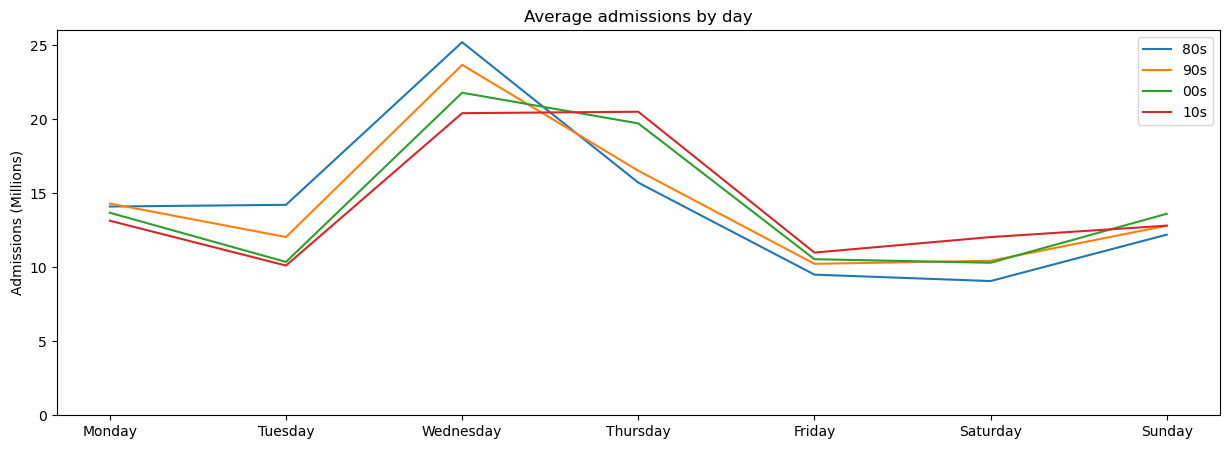

In [85]:
#création de tranches d'années
df = day_df
bins= [1980,1990,2000,2010,2020]
labels = ['80s','90s','00s','10s']
df['decade'] = pd.cut(df['Année'], bins=bins, labels=labels, right=False)

#suppression outlier
df = df.loc[df['Année'] != 2020 ]

#Courbe avec plt.plot. En partant du principe que profit = unité * 10
fig, ax = plt.subplots()
fig.set_size_inches(15,5)

x = df['Jour'].unique()
y1 = df.loc[df['decade'] == "80s", :]['Entrées (Millions)'].groupby(df['Jour']).mean()
y2 = df.loc[df['decade'] == "90s", :]['Entrées (Millions)'].groupby(df['Jour']).mean()
y3 = df.loc[df['decade'] == "00s", :]['Entrées (Millions)'].groupby(df['Jour']).mean()
y4 = df.loc[df['decade'] == "10s", :]['Entrées (Millions)'].groupby(df['Jour']).mean()
ax.plot(x, y1, label="80s")   
ax.plot(x, y2, label="90s")   
ax.plot(x, y3, label="00s")   
ax.plot(x, y4, label="10s")   

plt.ylabel("Admissions (Millions)")
plt.title("Average admissions by day")
plt.yticks(range(0, 30, 5))

plt.legend()


plt.show()
